In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/csv/ML Lab Session1 Data.xlsx")
df

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Candy,Mango,Milk
0,C_1,20,6,2,386,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,55.0,18.0
1,C_2,16,3,6,289,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C_3,27,6,2,393,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_4,19,1,2,110,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C_5,24,4,2,280,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,C_6,22,1,5,167,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C_7,15,4,2,271,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,C_8,18,4,2,274,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,C_9,21,1,4,148,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,C_10,16,2,4,198,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#What is the dimensionality of the vector space for this data?

df1=df[["Candies (#)","Mangoes (Kg)","Milk Packets (#)","Payment (Rs)"]]
df1.shape

(10, 4)

In [ ]:
#How many vectors exist in this vector space?
#4

In [5]:
# A will be Candies,Mangoes,MilkPackets,Payments
# C will be payments.

A = df[["Candies (#)","Mangoes (Kg)","Milk Packets (#)"]]
A

,Candies (#),Mangoes (Kg),Milk Packets (#)
0,20,6,2
1,16,3,6
2,27,6,2
3,19,1,2
4,24,4,2
5,22,1,5
6,15,4,2
7,18,4,2
8,21,1,4
9,16,2,4


In [6]:
#calculate the rank of matrix A
print("The Rank of Matrix A: ", np.linalg.matrix_rank(A))

The Rank of Matrix A:  3


In [7]:
C = df[["Payment (Rs)"]]
C
#C.shape

,Payment (Rs)
0,386
1,289
2,393
3,110
4,280
5,167
6,271
7,274
8,148
9,198


In [8]:
# Using Pseudo-Inverse find the cost of each product available for sale.
A_Inv = np.linalg.pinv(A)
A_Inv

array([[-0.01008596, -0.03124505,  0.01013951,  0.0290728 ,  0.0182907 ,
         0.01161794, -0.00771348,  0.00095458,  0.01743623, -0.00542016],
       [ 0.09059668,  0.07263726,  0.03172933, -0.09071908, -0.01893196,
        -0.06926996,  0.05675464,  0.03152577, -0.07641966,  0.00357352],
       [ 0.00299878,  0.15874243, -0.05795468, -0.06609024, -0.06295043,
         0.03348017,  0.01541831, -0.01070461,  0.00029003,  0.05938755]])

In [9]:
A_Inv.shape

(3, 10)

In [10]:
#A2 Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products available with the vendor.
X=np.matmul(A_Inv, C)

In [11]:
print(X)

   Payment (Rs)
0           1.0
1          55.0
2          18.0


In [12]:
#A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on purchase behavior.

df1['Status'] = np.where(df1['Payment (Rs)'] > 200, 'RICH', 'POOR')

<ipython-input-12-e636542820f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Status'] = np.where(df1['Payment (Rs)'] > 200, 'RICH', 'POOR')


In [13]:
df1["Status"]

0    RICH
1    RICH
2    RICH
3    POOR
4    RICH
5    POOR
6    RICH
7    RICH
8    POOR
9    POOR
Name: Status, dtype: object

In [19]:
de = pd.read_excel("/content/drive/MyDrive/csv/Lab Session1 Data StockPrice.xlsx")
de

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [20]:
#Calculate the mean and variance of the Price data present in column D.(Suggestion:use statistics.mean() & statistics.variance() methods)
m=de["Price"].mean()
print(m)

1560.6634538152612


In [21]:
v=de["Price"].var()
print(v)

58732.36535253918


In [22]:
#Select the price data for all Wednesdays and calculate the sample mean. Compare the mean with the population mean and note your observations
de1=de.query('Day == "Wed"')['Price']
print(de1)

4      2078.25
9      2089.95
14     2071.20
19     1917.95
24     1894.05
29     1858.10
33     1746.60
38     1723.65
43     1795.85
56     1709.00
60     1757.00
64     1760.55
69     1824.00
73     2018.50
78     1886.10
83     1675.45
88     1698.65
93     1618.40
98     1469.35
103    1438.25
107    1452.70
112    1461.15
117    1483.45
122    1434.95
126    1411.55
131    1423.40
136    1617.75
141    1349.90
145    1353.90
150    1365.30
154    1371.25
159    1300.55
164    1333.35
169    1331.75
174    1338.05
179    1356.90
183    1384.00
188    1372.85
193    1367.40
198    1348.90
203    1359.75
208    1369.30
213    1361.80
218    1386.80
223    1336.95
228    1352.75
233    1372.95
238    1351.95
243    1390.10
248    1363.05
Name: Price, dtype: float64


In [23]:
wrows = len(de1.axes[0])
print(wrows)

50


In [24]:
wm=de1.mean()
print(wm)

1550.7060000000001


In [25]:
#comparing population mean with sample mean of prices on all wednesdays

print(m-wm)

9.957453815261033


In [26]:
#Select the price data for the month of Apr and calculate the sample mean. Compare the mean with the population mean and note your observations.
de2=de.query('Month == "Apr"')['Price']
print(de2)

41    1791.40
42    1792.55
43    1795.85
44    1793.20
45    1730.85
46    1712.00
47    1673.05
48    1640.05
49    1612.70
50    1627.45
51    1608.10
52    1611.65
53    1582.00
54    1730.90
55    1726.40
56    1709.00
57    1688.55
58    1702.65
59    1751.75
Name: Price, dtype: float64


In [27]:
arows = len(de2.axes[0])
print(arows)

19


In [28]:
am=de2.mean()
print(am)

1698.9526315789474


In [29]:
#comparing population mean with sample mean of prices on all Apr months

print(m-am)

-138.2891777636862


In [30]:
#From the Chg% (available in column I) find the probability of making a loss over the stock
# Define a lambda function to filter negative values
negative_filter = lambda x: x < 0

# Apply the lambda function to the Chg% column and calculate the probability
total_rows = len(de)
negative_rows = de['Chg%'].apply(negative_filter).sum()
probability_of_loss = negative_rows / total_rows

print(f"Probability of making a loss over the stock: {probability_of_loss:.2%}")

Probability of making a loss over the stock: 49.80%


In [31]:
#Calculate the probability of making a profit on Wednesday.
# Filter rows corresponding to Wednesdays
wednesday_rows = de.query('Day == "Wed"')
# Define a lambda function to filter positive values
positive_filter = lambda x: x > 0

# Apply the lambda function to the Chg% column of Wednesday rows and calculate the probability
total_wednesday_rows = len(wednesday_rows)
positive_wednesday_rows = wednesday_rows['Chg%'].apply(positive_filter).sum()
probability_of_profit_on_wednesday = positive_wednesday_rows / total_wednesday_rows

print(f"Probability of making a profit on Wednesdays: {probability_of_profit_on_wednesday:.2%}")

Probability of making a profit on Wednesdays: 42.00%


In [32]:

#Calculate the conditional probability of making profit, given that today is Wednesday.
# Filter rows corresponding to Wednesdays
wednesday_rows = de[de['Day'] == 'Wed']

# Define a lambda function to filter positive values
positive_filter = lambda x: x > 0

# Apply the lambda function to the Chg% column of Wednesday rows
positive_wednesday_rows = wednesday_rows['Chg%'].apply(positive_filter)

# Calculate the conditional probability
total_positive_wednesday_rows = positive_wednesday_rows.sum()
total_wednesday_rows = len(wednesday_rows)
conditional_probability = total_positive_wednesday_rows / total_wednesday_rows

print(f"Conditional probability of making a profit, given that today is Wednesday: {conditional_probability:.2%}")

Conditional probability of making a profit, given that today is Wednesday: 42.00%


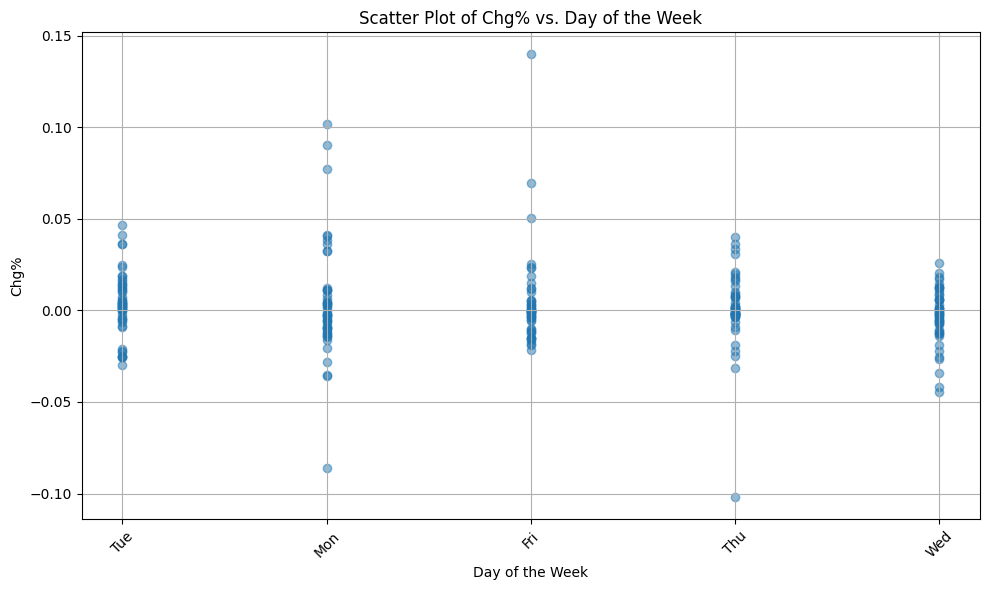

In [33]:
#Make a scatter plot of Chg% data against the day of the week

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(de['Day'], de['Chg%'], alpha=0.5)  # Create scatter plot
plt.title('Scatter Plot of Chg% vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()